Input ID number to search ==> 2342
# # Sorry, that is not here ! # #
# # searching random album... # #


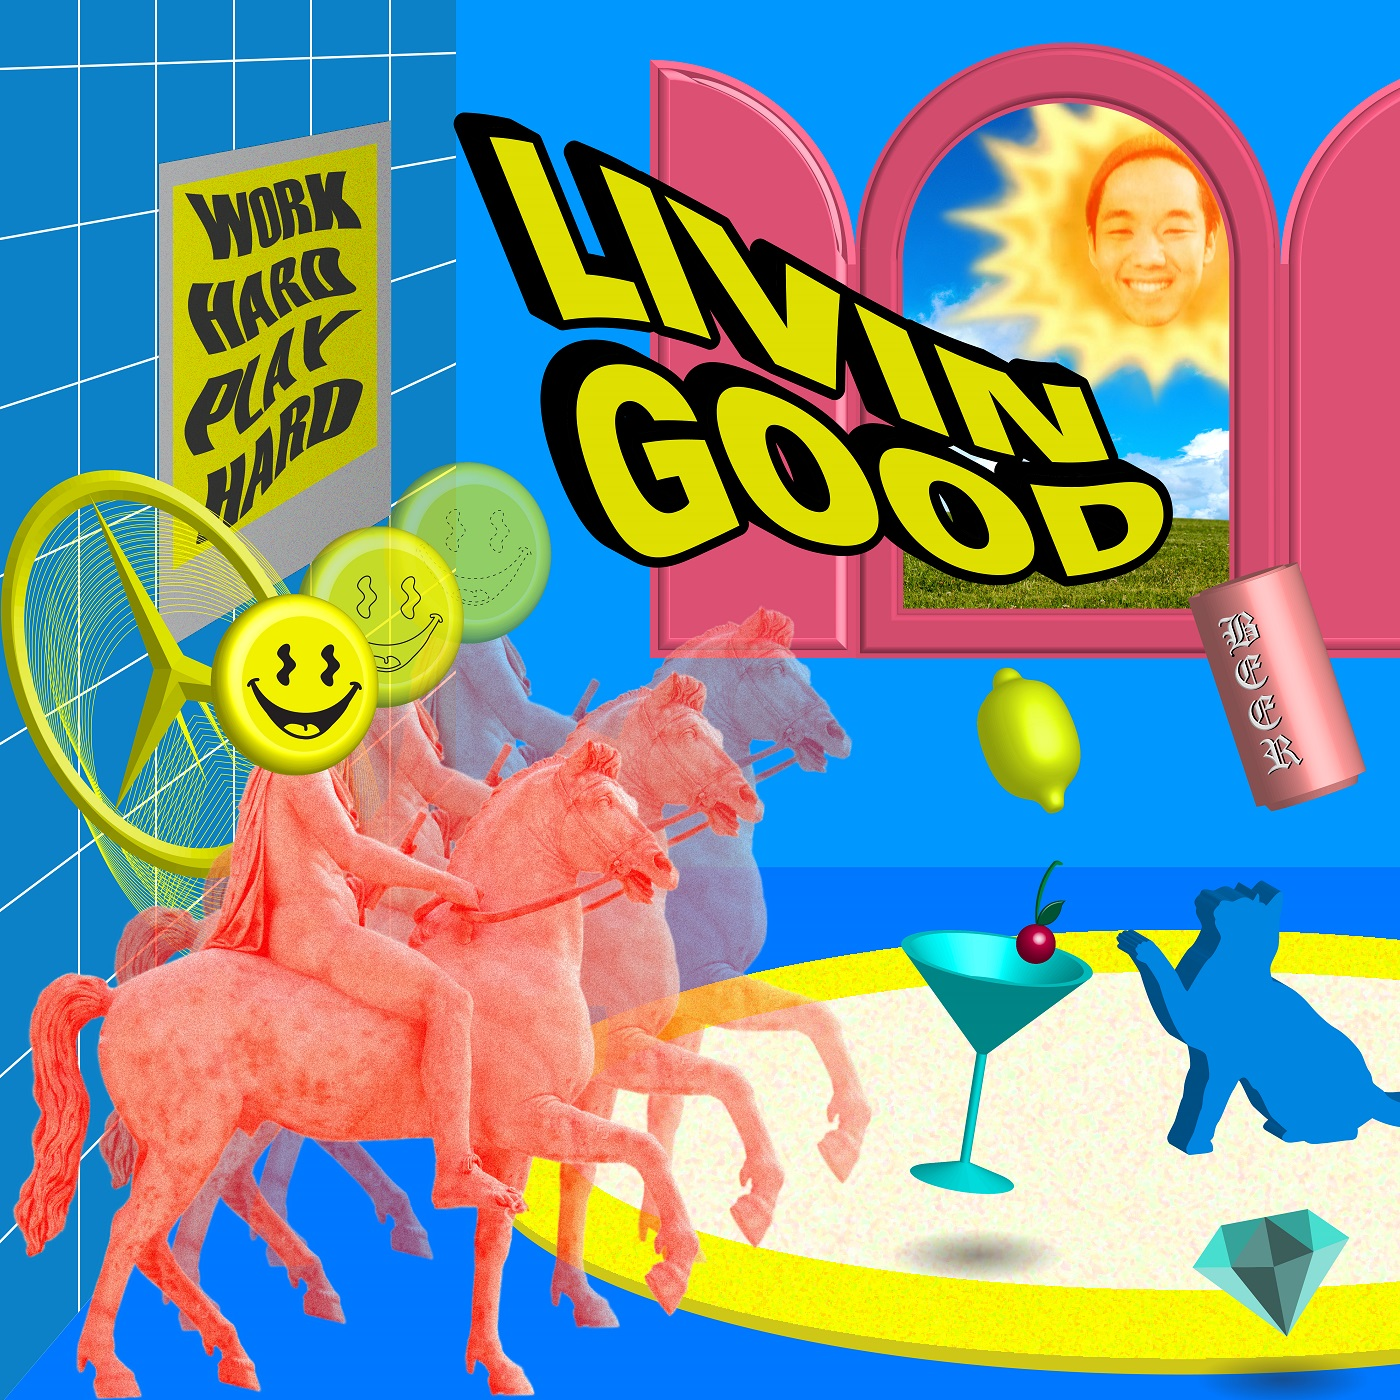

/usr/lib64/python3.4/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 170 of the file /usr/lib64/python3.4/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "html5lib")

  markup_type=markup_type))


Jenre ::  랩/힙합
distance ::  0.0
INPUT
http://musicmeta.phinf.naver.net/album/001/758/1758832.jpg


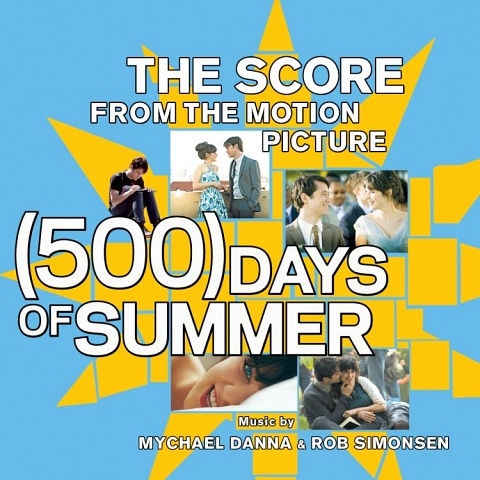

Jenre ::  영화음악
distance ::  0.694414395249


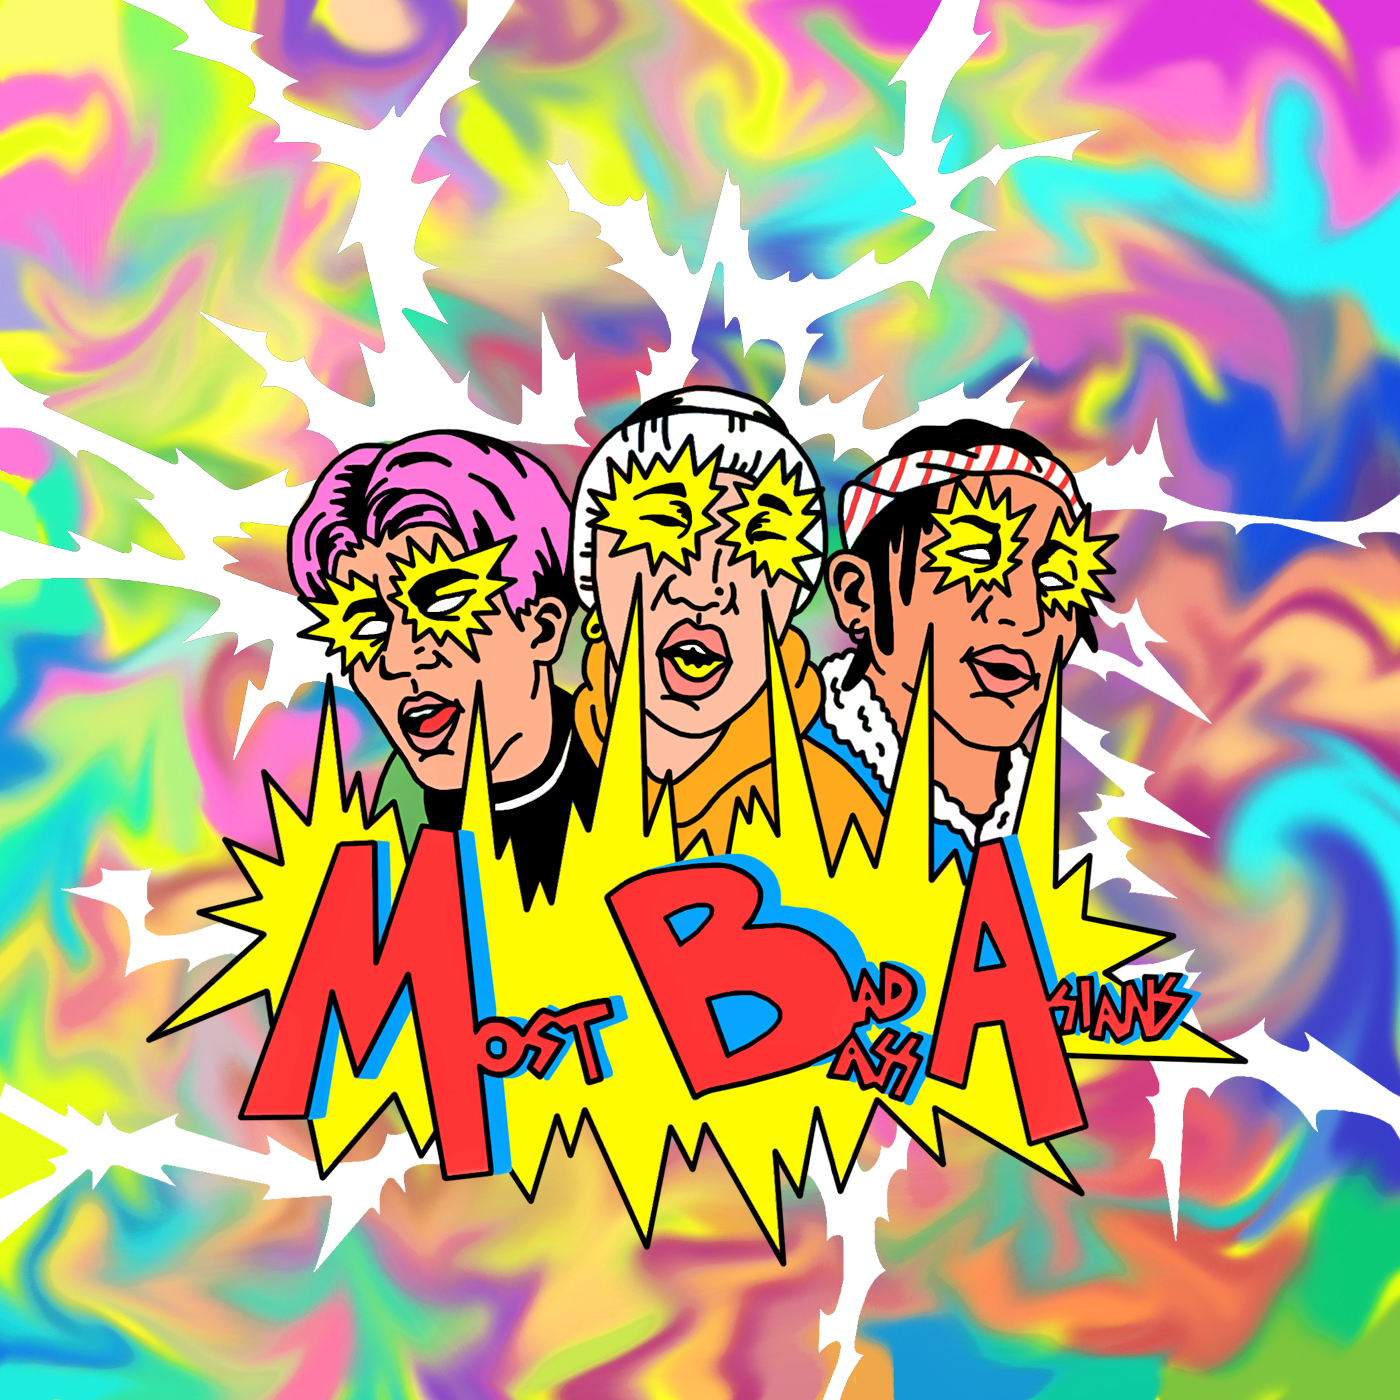

Jenre ::  랩/힙합
distance ::  0.771184661676


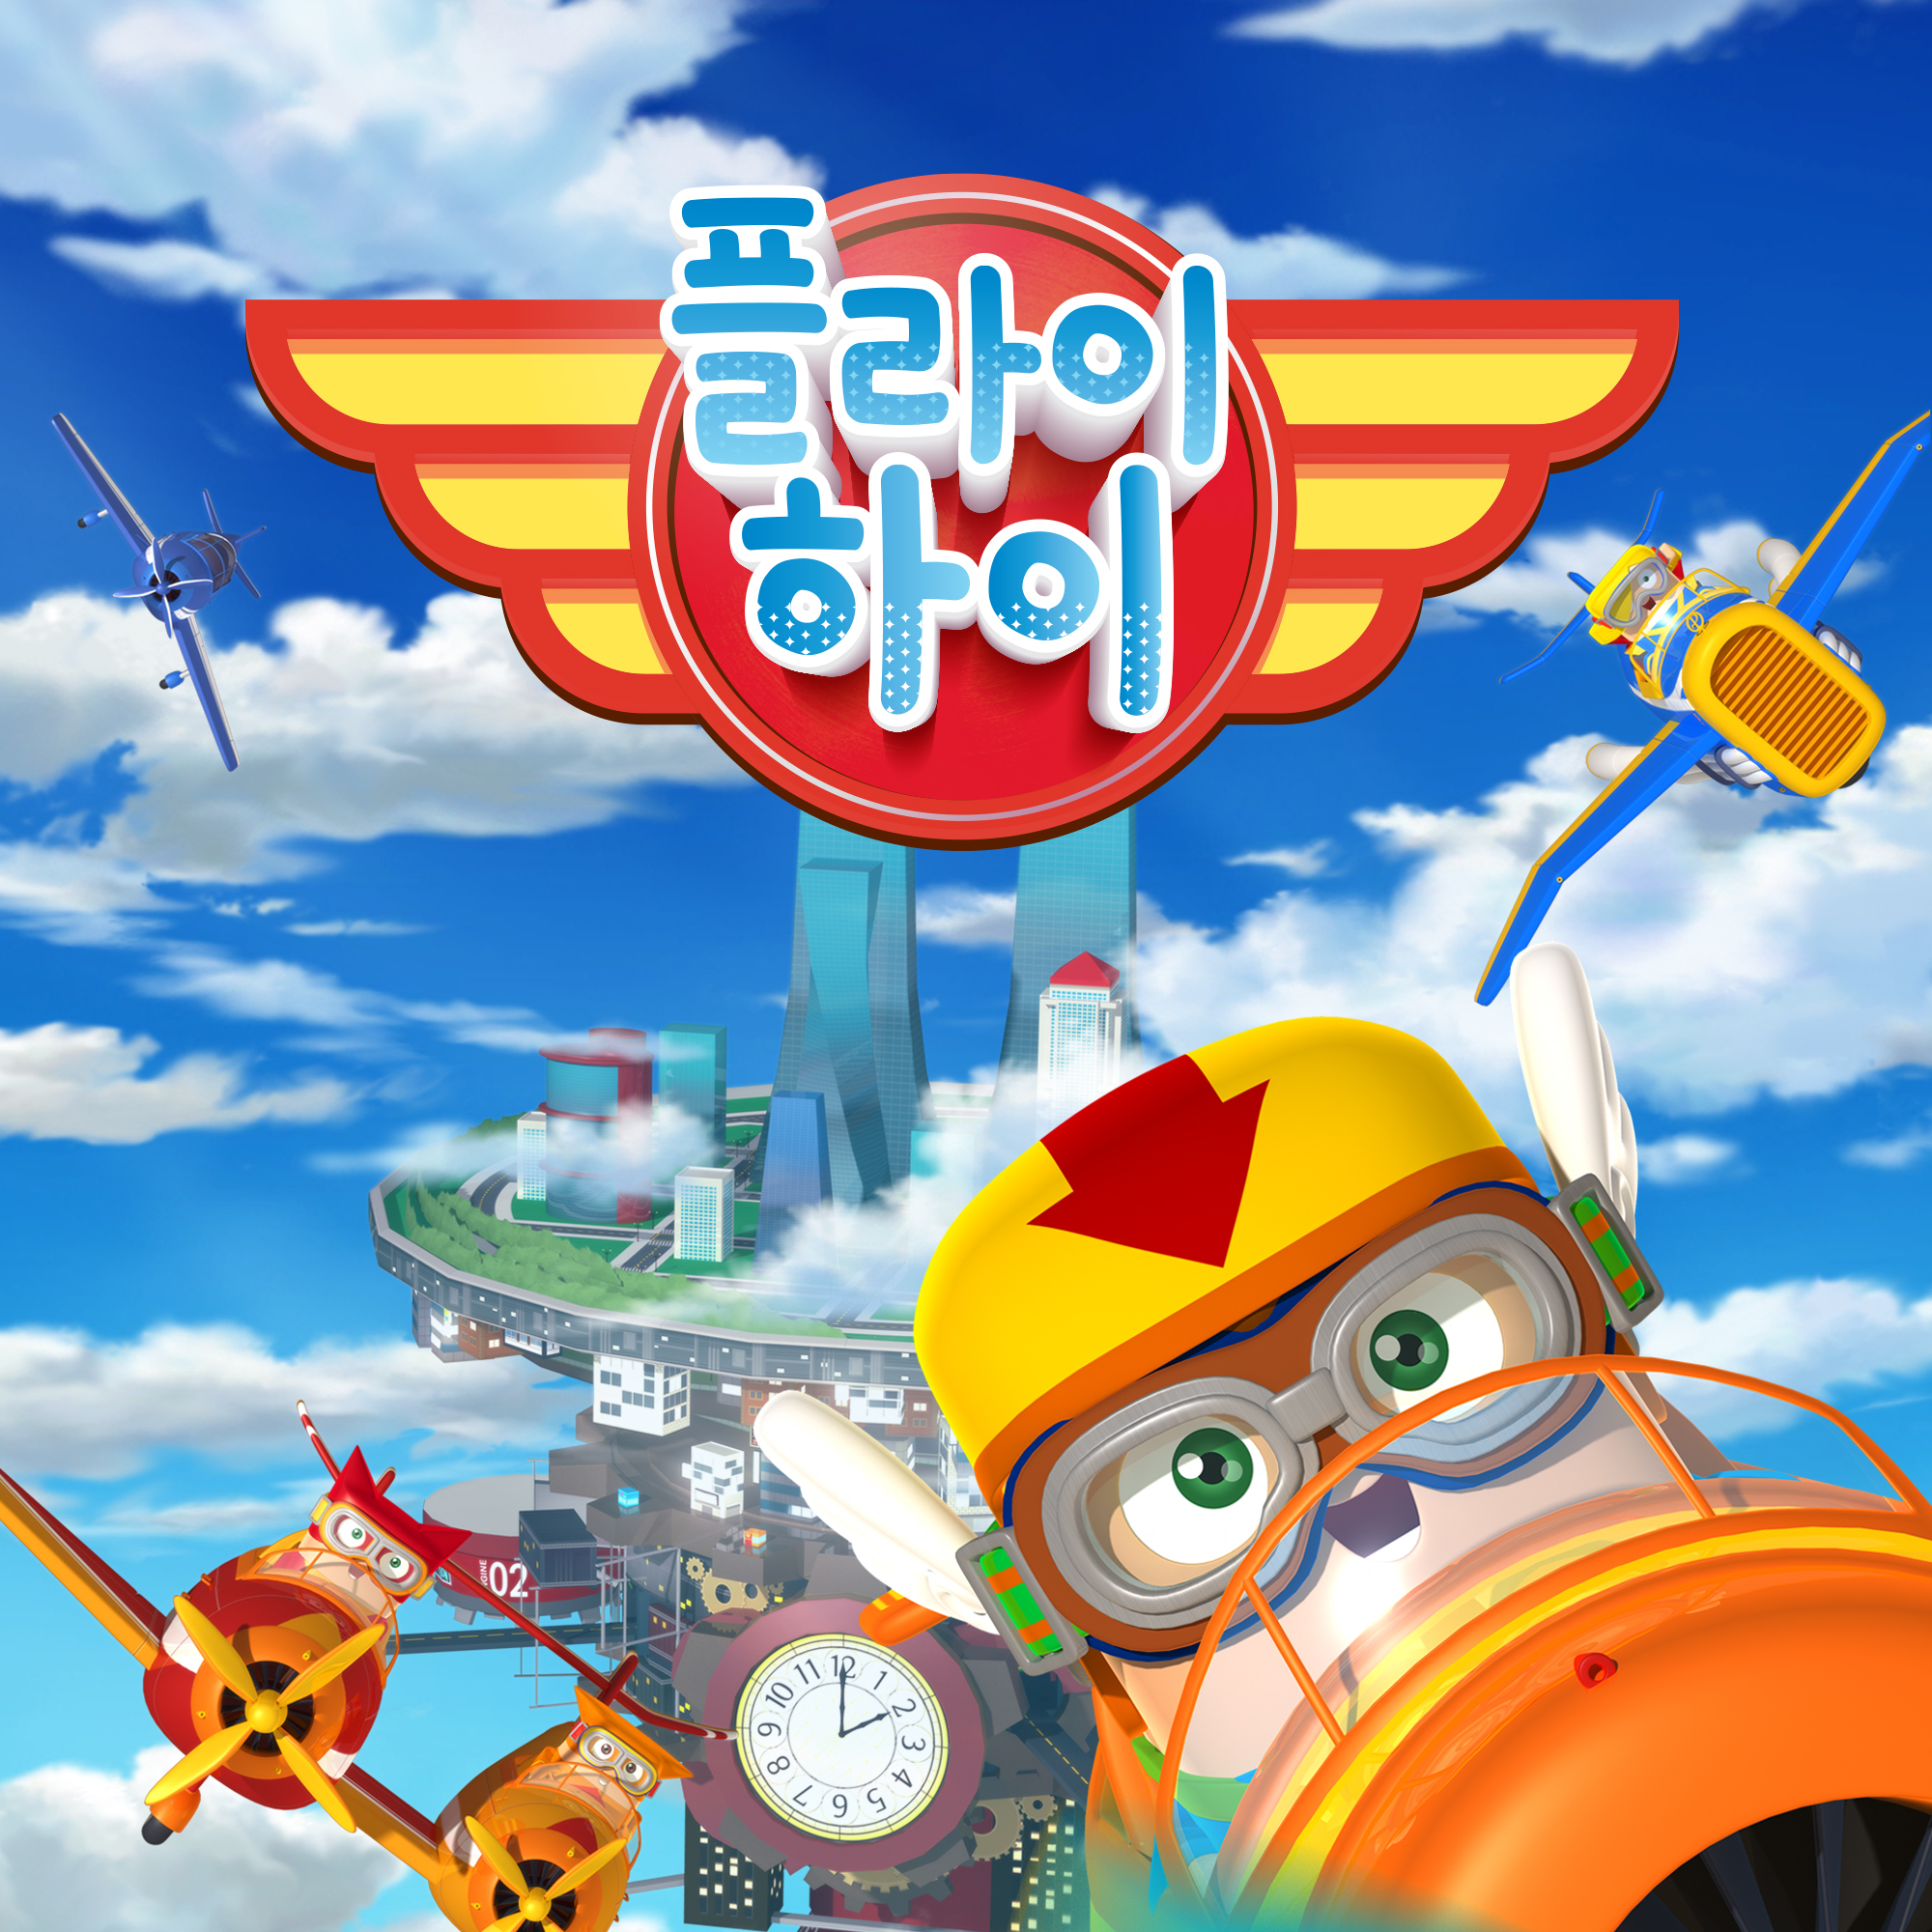

Jenre ::  CCM,  어린이 찬양
distance ::  0.882196306185


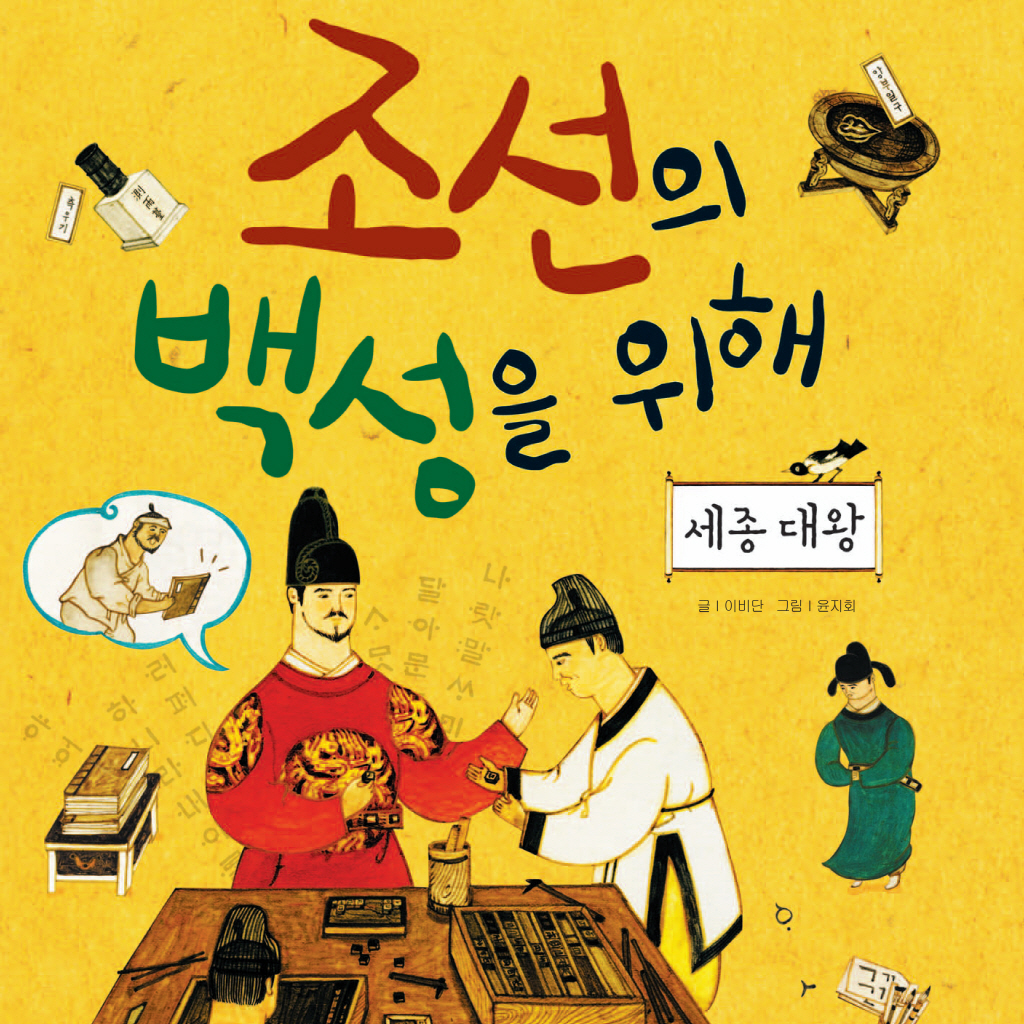

Jenre ::  구연동화
distance ::  0.904725807258


In [170]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from bs4 import BeautifulSoup
import numpy as np
import random
import pickle
import urllib.request
from sklearn.neighbors import NearestNeighbors
from sklearn.cross_validation import KFold
from PIL import Image
import imageio

%matplotlib inline
url = 'http://musicmeta.phinf.naver.net/album/%s/%s/%s.jpg'
def cal_param(val):
    dval = str(int(val / 1000))
    if len(dval) > 3:
        return dval[:-3].zfill(3), dval[-3:]
    else:
        return '000', dval.zfill(3)
    
def get_image_url(album_id):
    p1, p2 = cal_param(album_id)
    return url % (p1, p2, album_id)

def print_jenre(id):
    url = "http://music.naver.com/album/index.nhn?albumId="
    url = url + str(id)
    base_url = (url)
    soup = BeautifulSoup(urllib.request.urlopen(base_url).read())
    return soup.findAll("div",{"class":"info_txt"})[0].findAll("dl",{"class":"desc"})[0].findAll("dd")[1].string.strip()

def search_this():
    thisID = int(input("Input ID number to search ==> "))
    index = np.where(labels == thisID)
    
    if len(index[0]) == 0 :
        print("# # Sorry, that is not here ! # #")
        print("# # searching random album... # #")
        return random.randrange(0, 96000)
    else :
        return index[0][0]

new_man = []
man_file = open("./pickle_data/value_pickle3.txt", 'rb')
label_file = open("./pickle_data/name_pickle3.txt", 'rb')
entire_file = []
labels = []

for i in range(96000):
    new_man = pickle.load(man_file)
    label = pickle.load(label_file)
    entire_file.append(new_man)
    labels.append(label)

entire_file = np.array(entire_file)

labels = np.array(labels)
classifier = NearestNeighbors(n_neighbors=10)
classifier.fit(entire_file)
rand = search_this()
predict = classifier.kneighbors([entire_file[rand]], return_distance=True)

import io
templist = []
i = 0
for album_id in labels[predict[1][0]]:
    if album_id in templist:
        pass 
    else: 
        templist.append(album_id)
        url_ = get_image_url(album_id)
        from IPython.core.display import Image, display
        display(Image(url_, width=95, unconfined=True))
        print("Jenre :: ", print_jenre(str(album_id))) 
        print("distance :: ", predict[0][0][i])
        if labels[predict[1][0][0]] == album_id:
            print("INPUT")
            print(url_)
    i += 1

